## ANALYSIS

In [1]:
RESULT_JSON = "/Users/law/repos/viper/results/access_pattern/access_pattern_2020-06-09-09-58.json"

In [2]:
import json

results_raw = json.loads(open(RESULT_JSON).read())
assert results_raw["context"]["library_build_type"] != "debug"

BENCHMARKS =  results_raw["benchmarks"]
# print(BENCHMARKS)

In [3]:
from collections import defaultdict
runs = defaultdict(list)

DIMM = 'dimm'
BLOCK = 'block'

for bm in BENCHMARKS:
    if DIMM in bm['name']:
        runs[DIMM].append(bm)
    elif BLOCK in bm['name']:
        runs[BLOCK].append(bm)
    else:
        raise RuntimeError(f"Unknown benchmark type {bm['name']}")

runs[DIMM].sort(key=lambda x: x['threads'])
runs[BLOCK].sort(key=lambda x: x['threads'])

print(runs)

defaultdict(<class 'list'>, {'dimm': [{'name': 'ViperFixture/insert_dimm_based/100000000/100000000/iterations:1/repeats:1/real_time/threads:1', 'run_name': 'ViperFixture/insert_dimm_based/100000000/100000000/iterations:1/repeats:1/real_time/threads:1', 'run_type': 'iteration', 'repetitions': 1, 'repetition_index': 0, 'threads': 1, 'iterations': 1, 'real_time': 154113098.82299975, 'cpu_time': 153726227.932, 'time_unit': 'us', 'items_per_second': 648874.1110504234}, {'name': 'ViperFixture/insert_dimm_based/100000000/100000000/iterations:1/repeats:1/real_time/threads:2', 'run_name': 'ViperFixture/insert_dimm_based/100000000/100000000/iterations:1/repeats:1/real_time/threads:2', 'run_type': 'iteration', 'repetitions': 1, 'repetition_index': 0, 'threads': 2, 'iterations': 2, 'real_time': 39251227.7237256, 'cpu_time': 78294091.525, 'time_unit': 'us', 'items_per_second': 1273845.5049592562}, {'name': 'ViperFixture/insert_dimm_based/100000000/100000000/iterations:1/repeats:1/real_time/threads:

## PLOTS

In [8]:
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt
rcParams.update(json.loads(open("matplot_conf.json").read()))

# 'figure.figsize': (7.2,4.45),
# 'figure.figsize': (3.6,2.7),

import pprint
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

MILLION = 1_000_000

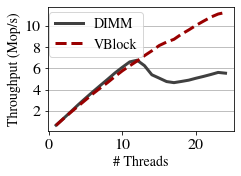

In [23]:
dimm_runs = [run['items_per_second'] / MILLION for run in runs[DIMM]]
block_runs = [run['items_per_second'] / MILLION for run in runs[BLOCK]]

fig, ax = plt.subplots()

#           red        blue       green      grey       purple
COLORS = ['#990000', '#000099', '#006600', '#404040', '#990099']

num_threads = list(range(1, 25, ))
ax.plot(num_threads, dimm_runs, label="DIMM", ls='-', color=COLORS[3])
ax.plot(num_threads, block_runs, label="VBlock", ls='--', color= COLORS[0])
ax.set_yticks(range(1, 12))
ax.yaxis.set_major_locator(MultipleLocator(2))

ax.set_ylabel("Throughput (Mop/s)")
ax.set_xlabel("# Threads")
ax.legend(frameon=True, bbox_to_anchor=(0.55, 0.54))

ax.grid(axis='y', which='major')
fig.savefig('charts/access_pattern.pdf', bbox_inches='tight')
fig.savefig('charts/access_pattern.svg', bbox_inches='tight')